In [2]:
import pandas as pd
import os




# $Y_i=f(\beta_i +\beta_1 x_1)$

# $Y_i\in \{0,1\}$

In [5]:
log_df = pd.read_csv(os.path.join("data", 'marks.txt'), header=None, names=['test1', 'test2', 'mark'])
log_df


,test1,test2,mark
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


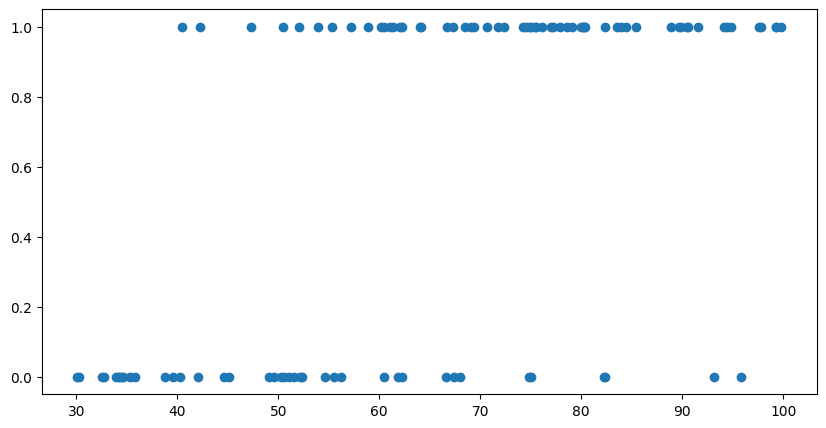

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1 , figsize=(10, 5))

ax.plot(log_df.test1, log_df.mark, 'o', label='test1')

<Axes: xlabel='test1', ylabel='test2'>

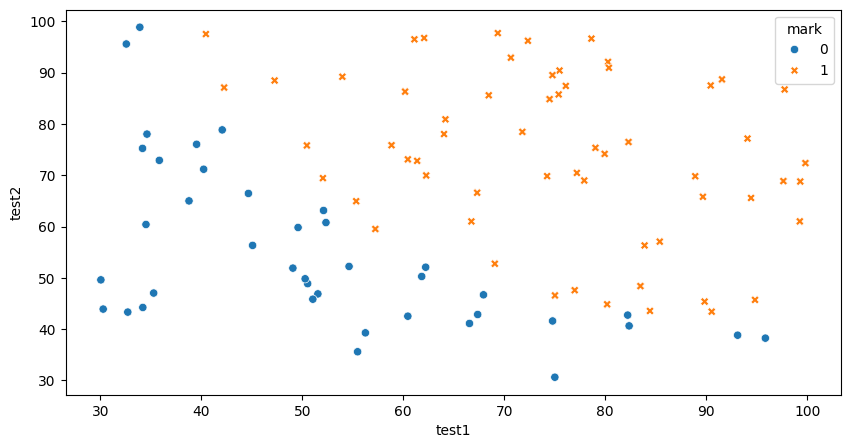

In [11]:
import seaborn as sns
fig, ax = plt.subplots(1,1 , figsize=(10, 5))

sns.scatterplot(data=log_df, x="test1", y="test2", style="mark", hue="mark", ax=ax)

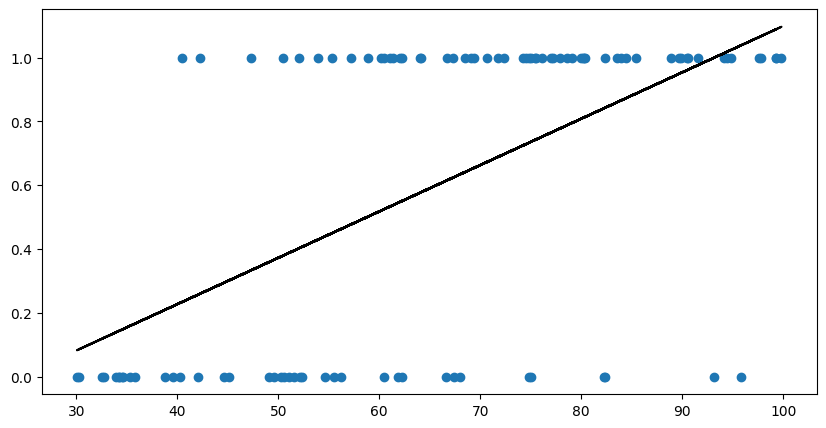

In [20]:

def lin_reg(x, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x, y)
    return model

x = log_df[['test1']]
y = log_df['mark']
model = lin_reg(x, y)
model.coef_, model.intercept_

fig, ax = plt.subplots(1,1 , figsize=(10, 5))

ax.plot(log_df.test1, log_df.mark, 'o', label='test1')

ax.plot(x, model.predict(x), color="k")

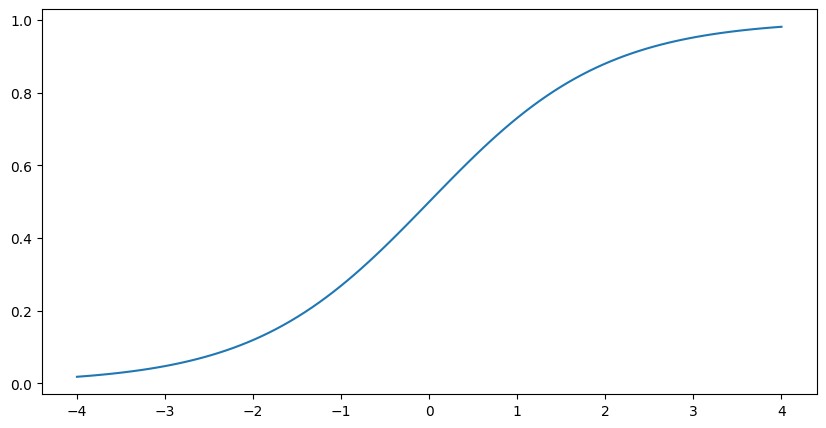

In [16]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x= np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1,1 , figsize=(10, 5))
ax.plot(x, sigmoid(x), label='sigmoid')

# $Y_i\in \{0,1\}$

# $Y_i=f(\beta_i +\beta_1 x_1)$

# $f(z)=\frac{1}{1+\exp\left(-z\right)}$

# $z=\beta_i +\beta_1 x_1$

array([0.14940128, 0.08640371, 0.1671772 , 0.5206649 , 0.79447789,
       0.30133542, 0.53408767, 0.73625869, 0.75185998, 0.87291834,
       1.03892967, 0.73609764, 0.84203992, 0.65404048, 0.22079085,
       0.43043731, 0.64976344, 0.6334468 , 0.67287927, 0.76464263,
       0.62509697, 0.94909091, 0.38052289, 0.14342249, 0.77837396,
       0.55100075, 0.81129069, 0.99902493, 0.54459768, 0.20985969,
       0.53804776, 0.88703304, 0.40337473, 0.40246577, 0.2309379 ,
       0.44008321, 0.13911471, 0.57868653, 0.73283798, 0.14300965,
       0.86521348, 0.39523652, 1.01832939, 0.84293616, 0.38797408,
       0.55029861, 0.7677548 , 1.06667456, 0.54812537, 0.97651847,
       0.8077266 , 1.08847671, 0.96172744, 0.14796111, 0.37691625,
       0.36675083, 1.06484481, 0.11967486, 0.7249859 , 0.68936535,
       0.74164581, 0.15902394, 0.46359627, 0.08309345, 0.295307  ,
       0.61331463, 0.23414312, 0.35928292, 0.81258919, 0.61601387,
       0.12179029, 0.57668679, 0.697355  , 0.52466365, 0.50117

In [25]:
sigmoid(model.predict(x))>0.65

array([False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True, False,
        True])

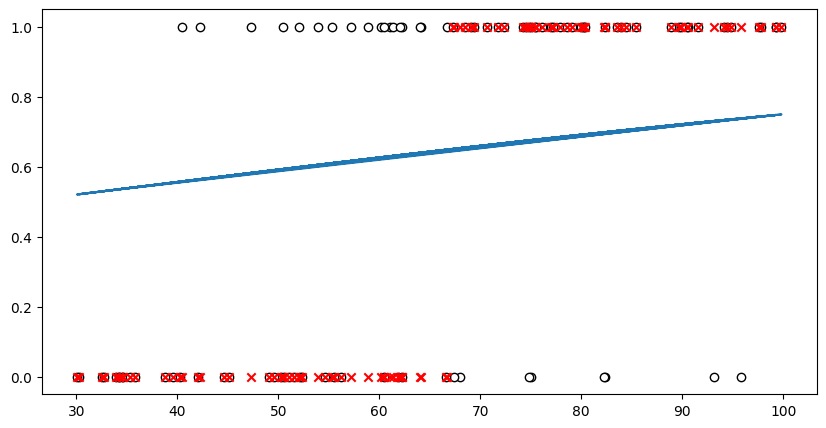

In [29]:
fig, ax = plt.subplots(1,1 , figsize=(10, 5))

ax.scatter(log_df.test1, log_df.mark, label='test1', ec="k", fc="w")
ax.plot(x, sigmoid(model.predict(x)), label='test1')
ax.scatter(x, sigmoid(model.predict(x))>0.65, label='prediction', marker='x', color='r')

# $\sum_i^n \mathbb{I_{y_i=\hat{y_i}}}$

# accuracy=$\sum_i^n \hat{y_i}^{y_i}*(1-\hat{y_i})^{1-y_i}$

# $y_i=\sigma\left(\beta_0+\beta_1x_i\right)$

# $\sigma(z)=\frac{1}{1+\exp\left(-z\right)}$


In [30]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

y_pred = sigmoid(model.predict(x))>0.65
y_true = log_df.mark
accuracy(y_true, y_pred)


0.74

In [40]:
import scipy.optimize as fmin

X = log_df[['test1', 'test2']]
y = log_df['mark']


def sigmoid(x):
    return 1/(1 + np.exp(-x))

def cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost    = (1/m)*(((-y).T @ np.log(h))-((1-y).T @ np.log(1-h)))
    return cost

θ_hat =  fmin.minimize(cost, x0=np.zeros(X.shape[1]), args=(X, y), method='TNC')


In [46]:
X.shape, θ_hat.x.shape

((100, 2), (2,))

In [51]:
def accuracy(X, θ, y_true):
    y_pred = sigmoid(X @ θ) > 0.5
    return (y_true == y_pred).mean()

accuracy(X, θ_hat.x, y)

0.6

<Axes: xlabel='test1', ylabel='test2'>

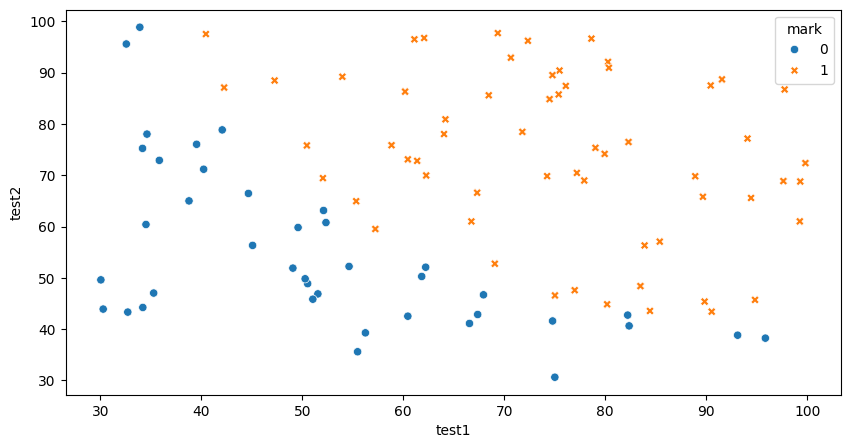

In [42]:

fig, ax = plt.subplots(1,1 , figsize=(10, 5))

sns.scatterplot(data=log_df, x="test1", y="test2", style="mark", hue="mark", ax=ax)